### <span style = 'color:grey'> Introduction: </span> Glasses detection plays an important role in face recognition and soft biometrices for person identification. However, automatic glasses detection is still a challenging problem under real application scenarios, because face variations, light conditions, and self-occlusion, have significant influence on its performance.

### <span style = 'color:red'>Objective</span>: Create a deep learning algorithm that can diffrentiate the people with eye glasses and without eye glasses on facial analysis 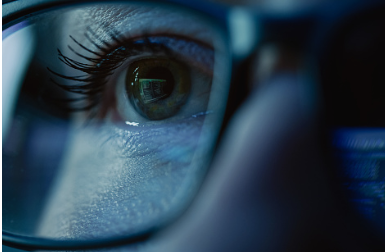 






#### For dataset <a href="https://drive.google.com/drive/folders/11MajaKB5T0cHRx5aXo9F72Un7hHqTCpA" title="Glasses dataset">   Click here</a>


**Outcomes of the Project**
- There are two diffrent classes in the dataset, Try to display the images of each class.
- Use CNN for model building.
- Explain the parameters in CNN and how it will alter the model building.
- Draw inference on Image augmentation.
- Draw inference on epochs and batch sizes.
- CNN model should be able to classify the people with and without glasses.

In [7]:
#import all the neccessary libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

In [9]:
# Defining paths to training and validation data directories
data_dir = "Downloads/glasses_3_3_1/glasses"

In [11]:
# Parameters of images for complete batch size
img_height, img_width = 150, 150
batch_size = 32

In [13]:
# Image Data Augmentation
data_gen = ImageDataGenerator(
    rescale=1./255,                # Normalize pixel values
    validation_split=0.2,          # Split dataset for training and validation
    rotation_range=20,             # Randomly rotate images
    width_shift_range=0.2,         # Randomly shift images horizontally
    height_shift_range=0.2,        # Randomly shift images vertically
    shear_range=0.2,               # Shear transformation
    zoom_range=0.2,                # Zoom in on images
    horizontal_flip=True           # Flip images horizontally
)

#### Inference on Image Augmentation:

#### Image augmentation techniques like rotation, zoom, and flipping help increase the diversity of training data, improving the model's ability to generalize and handle variations like lighting and orientation.

In [29]:
# Prepare training and validation datasets
train_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',           # Binary classification: with and without glasses
    subset='training'
)

val_data = data_gen.flow_from_directory(
    data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='binary',
    subset='validation'
)

Found 69 images belonging to 2 classes.
Found 17 images belonging to 2 classes.


Class: glasses, Index: 0
Class: no_glasses, Index: 1


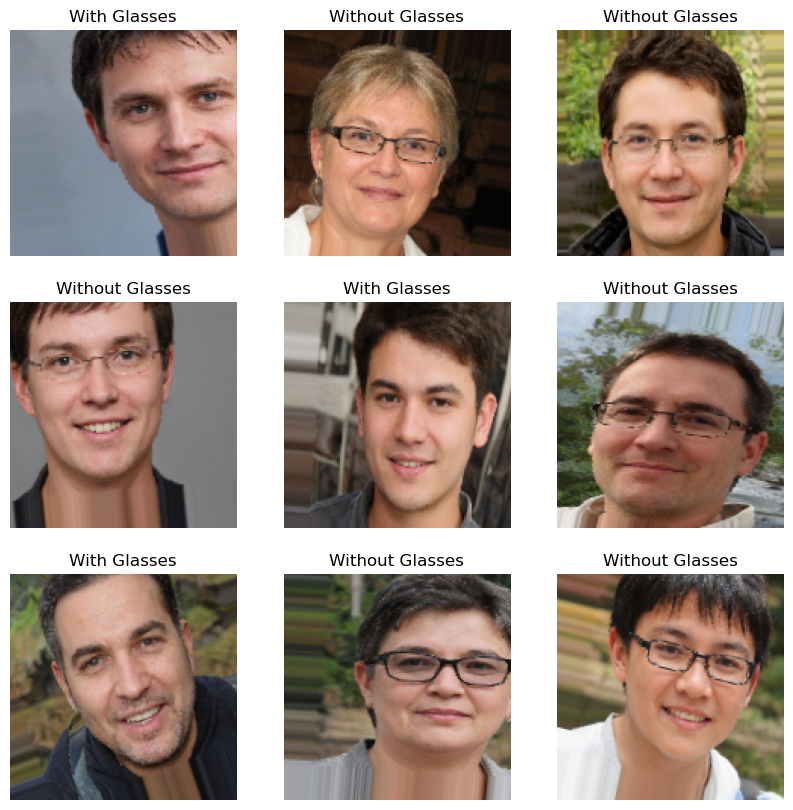

In [31]:
# Display a few images from each class
classes = train_data.class_indices
for class_name, class_index in classes.items():
    print(f"Class: {class_name}, Index: {class_index}")

sample_images, sample_labels = next(train_data)
plt.figure(figsize=(10, 10))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f"{'With Glasses' if sample_labels[i] == 1 else 'Without Glasses'}")
    plt.axis('off')
plt.show()

In [33]:
# Build CNN Model
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),  # Feature extraction
    MaxPooling2D(pool_size=(2, 2)),                                                 # Downsample spatial dimensions

    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    Flatten(),
    Dense(128, activation='relu'),                                                 # Fully connected layer
    Dropout(0.5),                                                                  # Reduce overfitting
    Dense(1, activation='sigmoid')                                                 # Output layer for binary classification
])

#### Explanation of Parameters in CNN:
#### Conv2D Filters: Extract features such as edges and textures.

#### Increasing filters captures more complex features.
#### Smaller kernel size (3x3) is common for detailed feature extraction.
#### MaxPooling2D: Reduces spatial dimensions and prevents overfitting.

#### Pool size (2x2) downsamples images by half.
#### Dense Layers: Fully connected layers for classification.

#### Nodes control the model’s capacity; too many may lead to overfitting.
#### Dropout: Randomly sets some layer outputs to zero during training.

#### Helps prevent overfitting

In [35]:
# Compile Model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])


In [57]:
# Model summary
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 148, 148, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 74, 74, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 72, 72, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 36, 36, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 34, 34, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 17, 17, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 36992)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │     4,735,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,485,445 (55.26 MB)

 Trainable params: 4,828,481 (18.42 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 9,656,964 (36.84 MB)

In [37]:
# Train Model
history = model.fit(
    train_data,
    validation_data=val_data,
    epochs=20,
    batch_size=batch_size
)

Epoch 1/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 3s 761ms/step - accuracy: 0.3570 - loss: 1.3263 - val_accuracy: 0.7059 - val_loss: 0.6620
Epoch 2/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 563ms/step - accuracy: 0.7100 - loss: 0.6005 - val_accuracy: 0.7059 - val_loss: 0.6036
Epoch 3/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 363ms/step - accuracy: 0.7099 - loss: 0.6167 - val_accuracy: 0.7059 - val_loss: 0.6083
Epoch 4/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 355ms/step - accuracy: 0.7178 - loss: 0.5635 - val_accuracy: 0.7059 - val_loss: 0.5976
Epoch 5/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 544ms/step - accuracy: 0.6600 - loss: 0.6511 - val_accuracy: 0.7059 - val_loss: 0.6318
Epoch 6/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 545ms/step - accuracy: 0.7640 - loss: 0.6117 - val_accuracy: 0.7059 - val_loss: 0.5919
Epoch 7/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 543ms/step - accuracy: 0.7100 - loss: 0.5923 - val_accuracy: 0.7059 - val_loss: 0.6025
Epoch 8/20
3/3 ━━━━━━━━━━━━━━━━━━━━ 1s 339ms/step - accuracy: 0.6760 - loss: 0.6255 - val_accuracy: 0.7059 - val_loss:

#### Inference on Epochs and Batch Sizes:
#### Epochs: Determines how many times the model sees the entire training dataset. Too few epochs may underfit; too many may overfit.
#### Batch Size: Controls how many samples are processed at once. Smaller batches use less memory but may be noisier during training.

In [41]:
# Evaluate Model
eval_loss, eval_acc = model.evaluate(val_data)
print(f"Validation Loss: {eval_loss}, Validation Accuracy: {eval_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step - accuracy: 0.7059 - loss: 0.5996
Validation Loss: 0.5995789766311646, Validation Accuracy: 0.7058823704719543


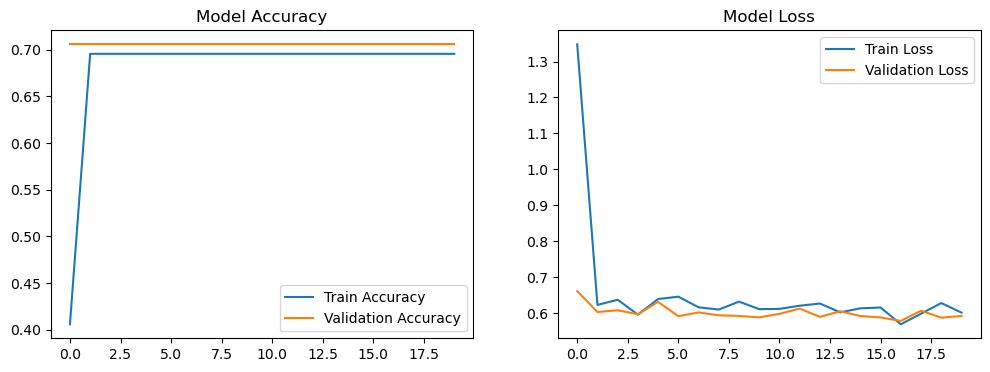

In [43]:
# Plot Training History
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Model Accuracy')

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Model Loss')
plt.show()

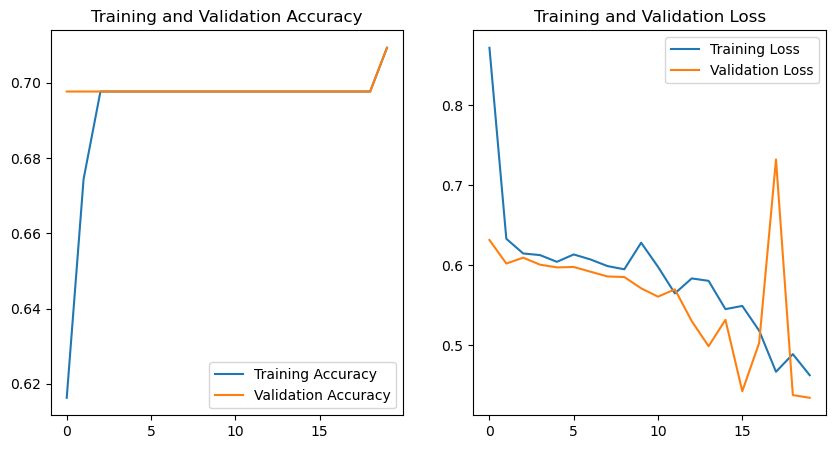

In [59]:
plot_history(history)

In [84]:
# Save Model
model.save('model_name.keras')

####  Conclusion:

####  The model classifies images into two classes (with and without glasses) with visualized training progress and saved model for future inference.